<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/2024/Caso_24_Distribuci%C3%B3n_Chi_cuadrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Simular variables aleatorias relacionadas con distribuciones chi cuadrada, visualizar densidad y calcualr probabildiades.

# Fundamento teórico


La distribución Chi cuadrado (distribución $\chi^2$ es una de las distribuciones más utilizadas en estadísticas para pruebas de hipótesis y análisis de datos.

Es una distribución de probabilidad fundamental en el campo de la inferencia estadística.

Una distribución chi cuadrada está muy relacionada con las distribuciones normales estandarizadas z.

La distribución Chi cuadrado es una distribución de la suma de los cuadrados de $k$ variables aleatorias normales estándar independientes.

Si $z_1$, $z_2$, ... , $z_k$ son
k variables aleatorias independientes, cada una siguiendo una distribución normal estándar
N(\mu=0,\sigma=1), entonces la variable denota como $\chi^2(k)$

$k$ Son los grados de libertad de la distribución.

$$
χ^{2} = z_1^2+z_3^2+z_3^2+z_k^2 = \sum_{k=1}^{n}z_k
$$

Una distribución Chi cuadrada con
$k$ grados de libertad, denotada como $\chi^{2}(k).

## Sus usos y aplicaciones.

* Ayuda a conceptualizar y entender la distribución Chi cuadrada como un caso particular de la transformación de variables normales estándar.
* Calcular probabilidad de una variable aleatoria continua con comportamiento de distribución chi cuadrada.
* Estimar intervalos de confianza de la variabilidad de una población.
* Facilitar el desarrollo de pruebas estadísticas, ya que la suma de cuadrados es común en métodos como la regresión lineal, ANOVA y pruebas de hipótesis.
* En análisis estadísticos complejos, donde las sumas de cuadrados surgen naturalmente, como en el análisis de varianza (ANOVA), se utilizan distribuciones Chi cuadrada para determinar *p-values* y hacer inferencias sobre los datos.
* En prueba de independencia de datos y para evaluar la hipótesis de que las categorías son independientes unas de otras.

Para efectos de este caso 25, sólo se generarán variables aleatorias chi cuadarada, se visualizará su densidad y se calcularán probabilidades.

En casos futuros se encontrará aplicaciones de pruebas de hipótesis , intervalos de confianza e independencia de datos.

## Función de densidad.

$$
f(x; k) = \frac{1}{2^{k/2} \Gamma(k/2)} x^{k/2 - 1} e^{-x/2} \quad \text{para } x > 0
$$

* $\text{para } x > 0$ significa que la variale aleatoria siempre es positiva incluyendo el cero.
* e $\approx$ 2.71828
* Γ es la función gamma, que generaliza el concepto de factorial a los números reales y complejos.
* $x$ es la variablea aleatoria
* $k$ son los grados de libertad $n-1$




## Función acumulada

La CDF (función acumulada) de una distribución Chi cuadrada se calcula generalmente mediante la integración de su función de densidad de probabilidad desde 0 hasta $x$. Se utiliza la función gamma incompleta para expresarla matemáticamente:


$$
F(x; k) = \int_0^x \frac{1}{2^{k/2} \Gamma(\frac{k}{2})} u^{\frac{k}{2} - 1} e^{-\frac{u}{2}} \, du
$$

o bien
$$
F(x; k) = \frac{\gamma(\frac{k}{2}, \frac{x}{2})}{\Gamma(\frac{k}{2})}
$$

## Valor esperado

En el caso de la distribución Chi cuadrada, el valor esperado *VE*, la varianza y la desviación estándar tienen relaciones muy directas con los grados de libertad de la distribución.

$$
VE = k \therefore \text {k = gl = grados de libertdad}
$$

## Varianza y desviacón estándar

La varianza de una distribución Chi cuadrada es el doble de sus grados de libertad. Por lo tanto, si  $X$ sigue una distribución Chi cuadrada con $k$ grados de libertad, su varianza es:

$$
var(x) = \sigma^2 = 2\cdot k
$$

$$
ds = \sigma = \sqrt{var(x)} = \sqrt{\sigma^2}
$$

## Funciones Python

En Python, se puede utilizar la biblioteca *scipy.stats* para trabajar con la distribución Chi cuadrad.

Las siguientes funciones específicas de *scipy.stats.chi2* para la generación de números aleatorios, cálculo de la función de densidad de probabilidad (pdf), función de distribución acumulativa (cdf), y la inversa de la función de distribución acumulativa (ppf, o percentil punto función):

* Números aleatorios (rvs): Genera números aleatorios que siguen una distribución Chi cuadrada con un número específico de grados de libertad.
* Función de densidad de probabilidad (pdf): Calcula el valor de la función de densidad de probabilidad para un valor dado de
$x$.
* Función de distribución acumulativa (cdf): Devuelve la probabilidad acumulada hasta un punto específico, lo cual es útil para calcular probabilidades de intervalos.
* Inversa de la función de distribución acumulativa (ppf): Calcula el valor de $x$ que corresponde a una probabilidad acumulada específica, lo que es útil para determinar umbrales o cuantiles.

# Desarrollo


## Cargar librerías


In [45]:
import pandas as pd
import numpy as np
import math as math

from scipy.stats import chi2 # chi cuadrada
import matplotlib.pyplot as plt # Visualizar datos



## Crear funciones



In [59]:
# Densidad chi cuadrada
def f_x_dens_chi_cuadrada(x, k):
    x = np.array(x)  # Esto permite realizar operaciones vectorizadas
    # Asegúrate de que x sea no negativo y k sea positivo
    if np.any(x < 0) or k <= 0:
        return np.zeros_like(x)  # Devuelve un array de ceros del mismo tamaño que x
    numerador = x ** ((k / 2) - 1) * np.exp(-x / 2)
    denominador = (2 ** (k / 2)) * math.gamma(k / 2)
    densidad = numerador / denominador
    return densidad

def f_visualizar_chi_cuadrada(numeros, gl):

  numeros = np.sort(numeros)

  # Calcula la densidad PDF para los valores de x
  pdf_values = chi2.pdf(numeros, gl)

  # Crea la gráfica
  plt.figure(figsize=(8, 4))
  plt.plot(numeros, pdf_values, label=f'Chi cuadrada con {gl} grados de libertad')
  plt.title('Función de Densidad de Probabilidad de la Distribución Chi cuadrada')
  plt.xlabel('Valor')
  plt.ylabel('Densidad')
  plt.legend()
  plt.grid(True)
  plt.show()

def f_visualizar_tres_chi_cuadrada(numeros, gl):
    # Ordenar los números para asegurar continuidad en la gráfica
    numeros = np.sort(numeros)

    # Crear la figura con tres subplots en una fila
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 3 subplots, uno al lado del otro

    # Ciclar a través de cada grado de libertad y crear cada subplot
    for ax, gl in zip(axes, gl):
        # Calcular la densidad PDF para los valores de x
        pdf_values = chi2.pdf(numeros, gl)

        # Graficar la PDF
        ax.plot(numeros, pdf_values, label=f'PDF de Chi cuadrada con {gl} gl')
        # ax.fill_between(numeros, pdf_values, color='red', alpha=0.5)

        # Añadir títulos y etiquetas
        ax.set_title(f'Chi cuadrada con {gl} grados de libertad')
        ax.set_xlabel('Valor')
        ax.set_ylabel('Densidad de probabilidad')
        ax.legend()
        ax.grid(True)

    # Mostrar la figura completa
    plt.tight_layout()
    plt.show()

def visualizar_VE_var_ds_chi_cuadrada(gl):
    # Cálculos estadísticos
    VE = gl
    varianza = 2 * gl
    ds = np.sqrt(varianza)

    # Imprimir resultados
    print("Valor Esperado =", VE)
    print("Varianza =", varianza)
    print("Desviación estándar =", np.round(ds, 4))

    # Generar valores para x y calcular la PDF
    x = np.linspace(0, VE + 4*ds, 1000)
    pdf_values = chi2.pdf(x, gl)

    # Crear la gráfica
    plt.figure(figsize=(8, 5))
    plt.plot(x, pdf_values, label=f'PDF de Chi cuadrada con {gl} grados de libertad')
    plt.axvline(x=VE, color='red', linestyle='dashed', linewidth=2, label=f'Valor Esperado (VE):{VE}; sd:{np.round(ds, 4)}')
    plt.axvline(x=VE + ds, color='blue', linestyle='dashed', linewidth=1, label=f'VE + 1 Desviación Estándar (DS): {np.round(VE-ds, 4)}')
    plt.axvline(x=VE - ds, color='blue', linestyle='dashed', linewidth=1, label=f'VE - 1 Desviación Estándar (DS): {np.round(VE+ds, 4)}')

    # Añadir títulos y etiquetas
    plt.title(f'Distribución Chi cuadrada con {gl} grados de libertad')
    plt.xlabel('Valor')
    plt.ylabel('Densidad de probabilidad')
    plt.legend()
    plt.grid(True)
    plt.show()

def f_visualizar_area_chi_cuadrada(numeros, gl, a, b):

  numeros = np.sort(numeros)

  # Calcula la densidad PDF para los valores de x
  pdf_values = chi2.pdf(numeros, gl)

  # Calcular la probabilidad acumulada entre a y b
  probabilidad = chi2.cdf(b, gl) - chi2.cdf(a, gl)

  # Crear la gráfica
  plt.figure(figsize=(8, 5))
  plt.plot(numeros, pdf_values, label=f'PDF de Chi cuadrada con {gl} gl')
  plt.fill_between(numeros, pdf_values, where=(numeros >= a) & (numeros <= b), color='red', alpha=0.5,
                     label=f'Área (Probabilidad entre {a} y {b}) = {probabilidad:.4f}')

  # Añadir títulos y etiquetas
  plt.title(f'Distribución Chi cuadrada con {gl} grados de libertad')
  plt.xlabel('Valor')
  plt.ylabel('Densidad de probabilidad')
  plt.legend()
  plt.grid(True)
  plt.show()

## Generar números aleatorios

Se generan $100$ números aleatorios de una distribución chi cuadrada a $10$ grados de libertad.




In [67]:
# Sembrar la semilla para reproducibilidad
np.random.seed(2024)

In [68]:
# Establecer los grados de libertad para la distribución Chi cuadrada
gl = 10 # grados de libertad

# Generar 100 números aleatorios siguiendo la distribución Chi cuadrada
n= 100
numeros = chi2.rvs(gl, size=n)

print("Números aleatorios Chi cuadrada:", numeros)

Números aleatorios Chi cuadrada: [18.55418583 12.89524017  8.48938832  8.69638429  1.97327479  4.69852562
 11.46510836  9.78122631  4.2352448   8.18368816  7.64495287  8.29619227
 14.03298611  6.39855056  4.264732    4.29890084  7.83894824  4.14891533
 12.63911453 13.00221457  6.67554943  8.8009585   8.75497856 10.1291438
 12.12413337  7.73826038 13.28186494  9.56556284  4.7160253   5.40226301
  7.80137721  9.99076565  7.19208149 13.93892071 14.44640789  5.09464095
 10.50775343  4.27303409  2.35266021  9.30102686  4.15710507 20.34783683
  5.92926684 14.39918222  7.30475557 13.96820923 10.45077286 14.33192748
 14.83256006  9.73899637  6.84834024 12.13177424  5.63297841 10.8101142
  4.97158137  5.33201235  9.71525249  9.78931817  3.96107393 15.10531531
  6.60690368  3.90845338  6.90334147  7.31863787  8.60634732 10.30509774
  8.30502707 13.29570713 12.12256807 10.14829002  5.79478503 19.31381449
 16.03885795  2.97997866  6.00871478  8.48133102 17.25274382  7.31656274
 16.17215842 13.7140

## Densidad de los datos

Se manda llamar la función para visualziar la densidad de los valores de la variable aleatoria chi cuadrada.


In [72]:
# Densidad con una lita de valores iniciales
valores = [1.97327479,  2.35266021,  2.97997866,  3.90845338,  3.96107393,  4.14891533]
print("Valores iniciales")
print(valores)
densidades_iniciales = f_x_dens_chi_cuadrada(valores, gl)
print("Densidades iniciales:", densidades_iniciales)



Valores iniciales
[1.97327479, 2.35266021, 2.97997866, 3.90845338, 3.96107393, 4.14891533]
Densidades iniciales: [0.00736034 0.01230274 0.02314181 0.04304757 0.0442338  0.0484676 ]


In [70]:
# Con los valores aleatoriamente generados
numeros = np.sort(numeros) # Ordenando los números
print(numeros)

print()
print ("La densidad de los números ordenados: ")
print(f_x_dens_chi_cuadrada(numeros, gl))

[ 1.97327479  2.35266021  2.97997866  3.90845338  3.96107393  4.14891533
  4.15710507  4.2352448   4.264732    4.27303409  4.29890084  4.37444585
  4.45742059  4.69852562  4.7160253   4.86202855  4.97158137  5.09464095
  5.33201235  5.40226301  5.63297841  5.79478503  5.92926684  6.00871478
  6.01688509  6.39855056  6.60690368  6.67554943  6.84834024  6.90334147
  6.98627534  7.19208149  7.30475557  7.31656274  7.31863787  7.64495287
  7.73826038  7.80137721  7.83612406  7.83894824  8.18368816  8.29619227
  8.30502707  8.48133102  8.48938832  8.60634732  8.69638429  8.75497856
  8.8009585   9.07400225  9.30102686  9.56333296  9.56556284  9.71525249
  9.73899637  9.78122631  9.78931817  9.99076565 10.1291438  10.13831887
 10.14829002 10.30509774 10.45077286 10.50775343 10.8101142  10.85291187
 11.04067008 11.32131045 11.46510836 11.76272255 12.12256807 12.12413337
 12.13177424 12.44827462 12.63911453 12.89524017 13.00221457 13.28186494
 13.29570713 13.71409143 13.93892071 13.96820923 14

## Visualizar la densidad de los datos

Con los números aleatorios generados visualizar la densidad.

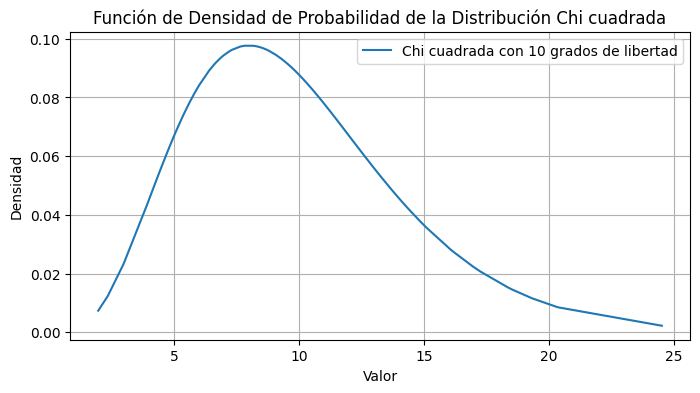

In [63]:
f_visualizar_chi_cuadrada(numeros, gl)

## Visualizar los datos a distintos grados de libertad

Se observa diferente la densidad de cada curva a distintos grados de libertdad.



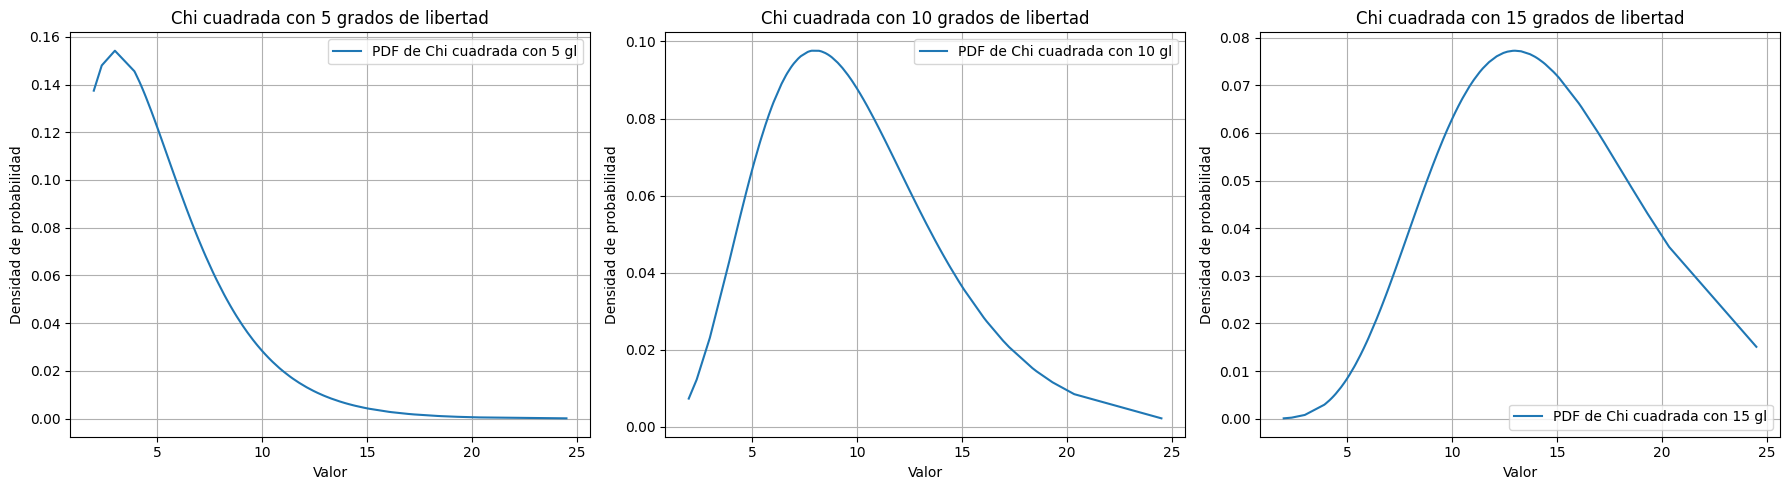

In [73]:
f_visualizar_tres_chi_cuadrada(numeros, [5, 10, 15])

## Valor esperdo VE, varianza y desviación estándar



Valor Esperado = 10
Varianza = 20
Desviación estándar = 4.4721


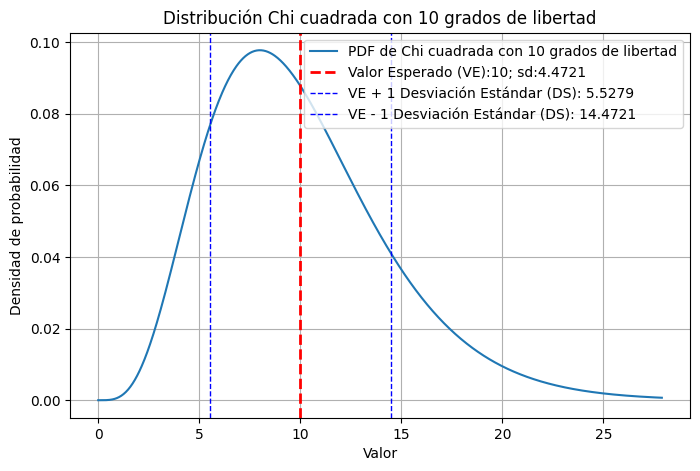

In [74]:

visualizar_VE_var_ds_chi_cuadrada(gl)


## Probabilidad entre 5 y 10 a 10 gl

$$
F(5 \le x \le 10)
$$

La probabilidad de toda el área bajo la curva es $1$ o $100$$, se cacula la probabilidad de un intervalo entre $a$ y $b$.



In [76]:
a = 5
b = 10
probabilidad = chi2.cdf(b, gl) - chi2.cdf(a, gl)
print("Probabilidad entre ", a , " y ",  b, " : ", np.round(probabilidad, 4), " a ", gl, " grados de libertad")


Probabilidad entre  5  y  10  :  0.4507  a  10  grados de libertad


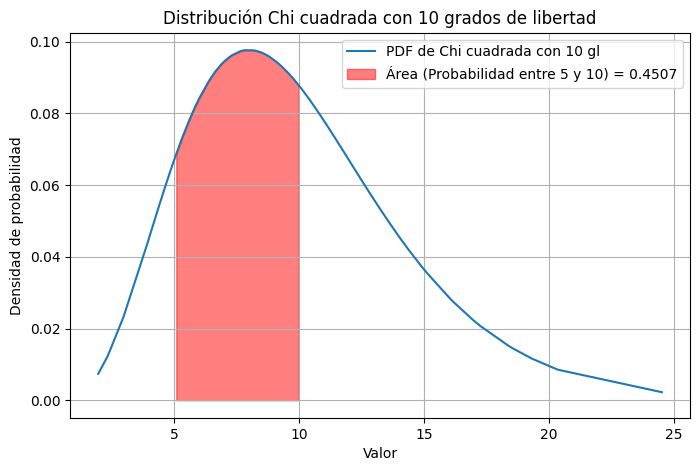

In [77]:
f_visualizar_area_chi_cuadrada(numeros, gl, a, b)

## Probabilidad entre 10.6 y 20.95 a 10 gl

$$
F(10.6 \le x \le 20.95)
$$

Probabilidad entre  10.6  y  20.95  :  0.3681  a  10  grados de libertad


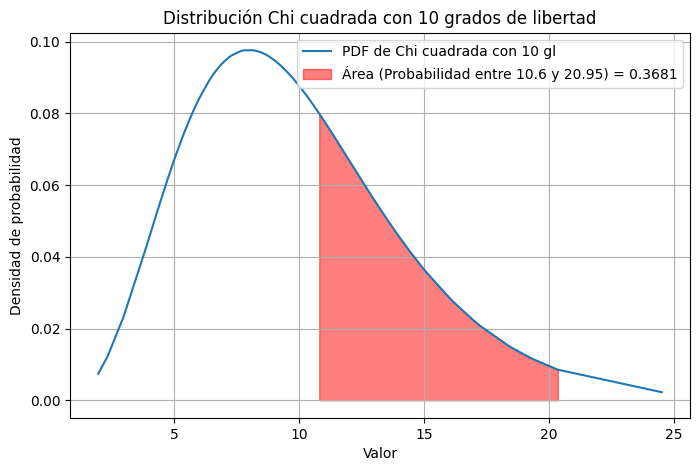

In [78]:
a = 10.6
b = 20.95
probabilidad = chi2.cdf(b, gl) - chi2.cdf(a, gl)
print("Probabilidad entre ", a , " y ",  b, " : ", np.round(probabilidad, 4), " a ", gl, " grados de libertad")
f_visualizar_area_chi_cuadrada(numeros, gl, a, b)

## Probabilidad menor a 15.5

$$
F(0 \le x \le 15.5)
$$

Probabilidad entre  0  y  15.5  :  0.8851  a  10  grados de libertad


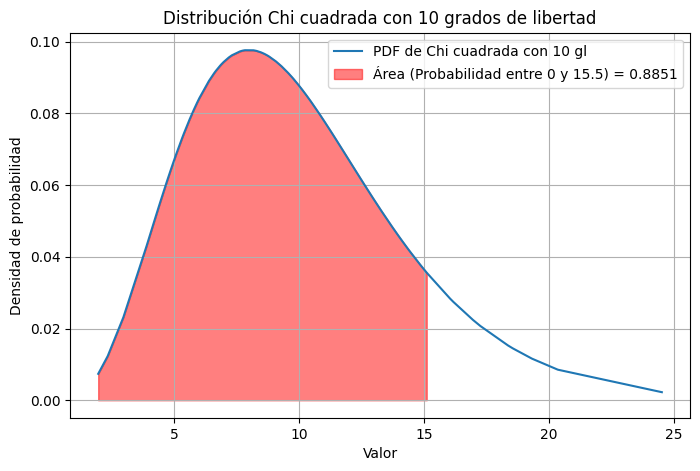

In [79]:
a = 0
b = 15.5
probabilidad = chi2.cdf(b, gl) - chi2.cdf(a, gl)
print("Probabilidad entre ", a , " y ",  b, " : ", np.round(probabilidad, 4), " a ", gl, " grados de libertad")
f_visualizar_area_chi_cuadrada(numeros, gl, a, b)

## Probabilidad mayor o igual a 20
F(20 ≤ x ≤ ∞)


Probabilidad entre  20  y  inf  :  0.0293  a  10  grados de libertad


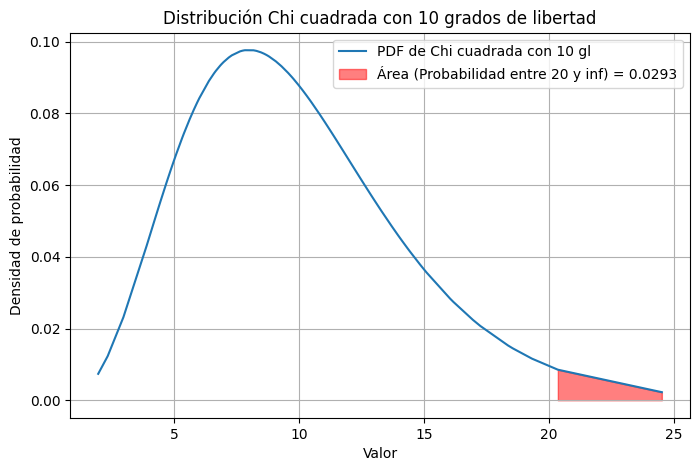

In [93]:
a = 20
b = np.inf
probabilidad = chi2.cdf(b, gl) - chi2.cdf(a, gl)
print("Probabilidad entre ", a , " y ",  b, " : ", np.round(probabilidad, 4), " a ", gl, " grados de libertad")
f_visualizar_area_chi_cuadrada(numeros, gl, a, b)

# Interpretación


* Cómo se calcula la densidad de una distribución de variables aleatorias continuas con comportamiento chi cuadrada?
* ¿Cómo es a curva, es simétrica o asimétrica y que forma tiene?
* ¿Se pueden calcular probabilidad con la ditribución chi cuadrada?
* ¿Qué representa el valor de grados de libertdad y cómo se establece?
* ¿Las curvas a distintos grados de libertad de una distribución chi cuadrada son iguales?
* ¿Cuál es la probabilidad de una distribución chi cuadrada a 15 grados de libertad entre 7 y 12 los valores de x. $F(7 \le x \le 12)$.
* ¿Cuál es la probabilidad de una distribución chi cuadrada a 20 grados de libertad entre 7 y 12 los valores de x. $F(7 \le x \le 12)$.
* ¿Cuál es la probabilidad de una distribución chi cuadrada a 15 grados de libertad mayor que 10 los valores de x. $F(0 \le x \le ∞)$.
* ¿Cuál es la probabilidad de una distribución chi cuadrada a 15 grados de libertad menor o igual que 10 los valores de x. $F(0 \le x \le 10)$.
¿Qué significa el valor esperado (VE) y la dispersión (varianza y desviación estándar de una distribucion de datos chi cuadrada?


